In [2]:
import pandas as pd
from sklearn.metrics import f1_score

msrp = pd.read_csv('data/processed/msrp_train_translated_id.txt', sep='\t', quotechar='^')

In [1]:
train_df = pd.read_csv('data/processed/msr_train_id.txt', sep='\t')

NameError: name 'pd' is not defined

In [68]:
paws = pd.read_csv('data/processed/paws_train_translated_id.txt', sep='\t')

In [35]:
from mpstemmer import MPStemmer
import string

stemmer = MPStemmer()

def preprocess_sentence(list_of_sentences):
    preprocessed = []
    for sentence in list_of_sentences:
        sentence = sentence.translate(str.maketrans('','',string.punctuation))
        sentence = sentence.lower()
        sentence = stemmer.stem_kalimat(sentence)
        preprocessed.append(sentence)
    return preprocessed

In [36]:
train_df['preprocessed_sentence1'] = preprocess_sentence(train_df['sentence1'])
train_df['preprocessed_sentence2'] = preprocess_sentence(train_df['sentence2'])

In [70]:
paws['preprocessed_sentence1'] = preprocess_sentence(paws['sentence1'])
paws['preprocessed_sentence2'] = preprocess_sentence(paws['sentence2'])

In [37]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score

def extract_feat_1(df_train, df_test, inductive=True):
    if inductive:
        all_sentences = np.concatenate([df_train['preprocessed_sentence1'], df_train['preprocessed_sentence2']])
    else:
        all_sentences = np.concatenate([df_train['preprocessed_sentence1'], df_train['preprocessed_sentence2'],
                                        df_test['preprocessed_sentence1'], df_test['preprocessed_sentence2']])
    vec = CountVectorizer(binary=True)
    vec.fit(all_sentences)
    
    X1_train = vec.transform(df_train['preprocessed_sentence1']).toarray()
    X2_train = vec.transform(df_train['preprocessed_sentence2']).toarray()
    
    X1_test = vec.transform(df_test['preprocessed_sentence1']).toarray()
    X2_test = vec.transform(df_test['preprocessed_sentence2']).toarray()
    
    feat_1_train = [jaccard_score(x1, x2, average='binary') for x1, x2 in zip(X1_train, X2_train)]
    feat_1_test = [jaccard_score(x1, x2, average='binary') for x1, x2 in zip(X1_test, X2_test)]
    
    df_feat_train = pd.DataFrame(feat_1_train, columns=['Jaccard_Score'])
    df_feat_train['label'] = df_train['label']
    
    df_feat_test = pd.DataFrame(feat_1_test, columns=['Jaccard_Score'])
    df_feat_test['label'] = df_test['label']
    
    return df_feat_train, df_feat_test

In [64]:
train, test = extract_feat_1(train_df, train_df.iloc[0:1].copy(), inductive=True)

In [71]:
train, test = extract_feat_1(paws, paws.iloc[0:1].copy(), inductive=True)


In [73]:
train.to_csv('data/features/feat_exp_2_a_paws.csv')

In [74]:
X = train.drop(columns=['label'])
y = train['label']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

list_f1 = []
list_i = [i/10000 for i in range(1,10000)]
f1_max = 0
i_max = 0
for i in range (1,10000):
    threshold = i/10000
    y_pred = (X_test['Jaccard_Score'] >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    list_f1.append(f1)
    if f1_max < f1:
        f1_max = f1
        i_max = i/10000
    print(f1_max)
    print(i_max)

0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0.40307242136064375
0.0001
0

In [66]:
list_f1 = []
list_i = [i/1000 for i in range(1,1000)]
f1_max = 0
i_max = 0
for i in range (1,1000):
    threshold = i/1000
    y_pred = (X['Jaccard_Score'] >= threshold).astype(int)
    f1 = f1_score(y, y_pred, average='macro')
    list_f1.append(f1)
    if f1_max < f1:
        f1_max = f1
        i_max = i/1000
    print(f1_max)
    print(i_max)

0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.40476122830824335
0.001
0.4047612283

In [76]:
list_f1_paws = []
list_i = [i/1000 for i in range(1,1000)]
f1_max_paws = 0
i_max_paws = 0
for i in range (1,1000):
    threshold = i/1000
    y_pred = (X['Jaccard_Score'] >= threshold).astype(int)
    f1 = f1_score(y, y_pred, average='macro')
    list_f1_paws.append(f1)
    if f1_max_paws < f1:
        f1_max_paws = f1
        i_max_paws = i/1000
    print(f1_max_paws)
    print(i_max_paws)

0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001
0.3063972726042116
0.001


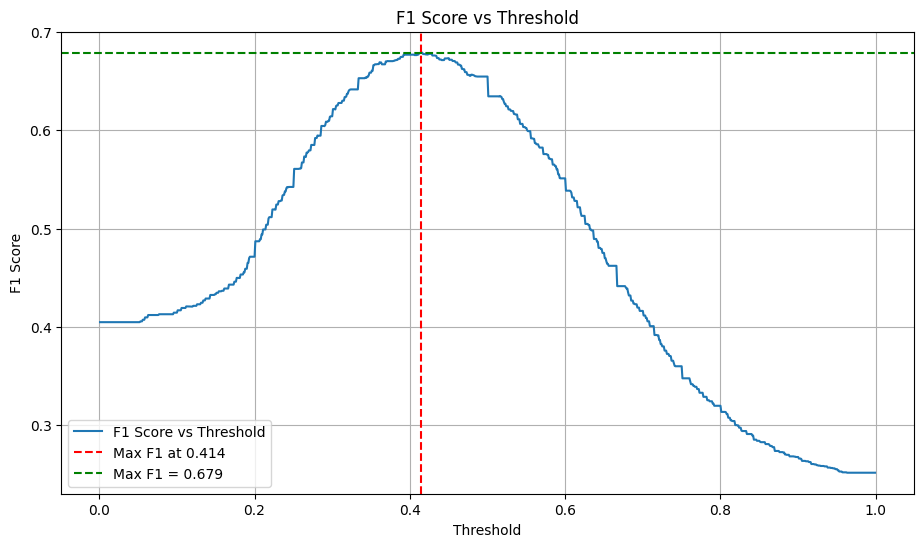

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 6))
plt.plot(list_i, list_f1, label='F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.axvline(x=i_max, color='r', linestyle='--', label=f'Max F1 at {i_max:.3f}')
plt.axhline(y=f1_max, color='g', linestyle='--', label=f'Max F1 = {f1_max:.3f}')
plt.legend()
plt.grid(True)
plt.show()

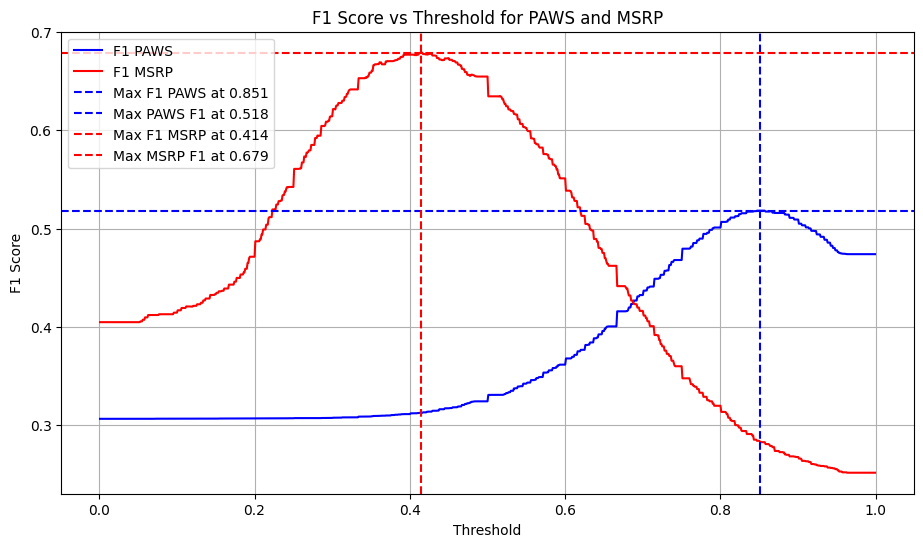

In [87]:
plt.figure(figsize=(11, 6))
plt.plot(list_i, list_f1_paws, label='F1 PAWS', color='blue')
plt.plot(list_i, list_f1, label='F1 MSRP', color='red')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold for PAWS and MSRP')
plt.axvline(x=i_max_paws, color='blue', linestyle='--', label=f'Max F1 PAWS at {i_max_paws:.3f}')
plt.axhline(y=f1_max_paws, color='blue', linestyle='--', label=f'Max PAWS F1 at {f1_max_paws:.3f}')
plt.axvline(x=i_max, color='red', linestyle='--', label=f'Max F1 MSRP at {i_max:.3f}')
plt.axhline(y=f1_max, color='red', linestyle='--', label=f'Max MSRP F1 at {f1_max:.3f}')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
list_f1 = []
list_i = [i for i in range(1,1000)]
f1_max = 0
i_max = 0
for i in range (1,1000):
    threshold = i/1000
    train_df['predicted'] = (train_df['feat_bert_score'] >= threshold).astype(int)
    f1 = f1_score(train_df['label'], train_df['predicted'], average='macro')
    list_f1.append(f1)
    if f1_max < f1:
        f1_max = f1
        i_max = i
    print(f1_max)
    print(i_max)

0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.4031336945379997
1
0.40313369453

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, train_df['label'], test_size=0.2, random_state=42, stratify=train_df['label'])

list_f1 = []
list_i = [i for i in range(1,1000)]
f1_max = 0
i_max = 0
for i in range (1,1000):
    threshold = i/1000
    y_pred = (X_test['feat_smatch'] >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    list_f1.append(f1)
    if f1_max < f1:
        f1_max = f1
        i_max = i
    print(f1_max)
    print(i_max)

0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242136064375
1
0.40307242

In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data dummy untuk ilustrasi
import numpy as np
import pandas as pd

# Membuat data dummy dengan satu fitur
X = np.random.rand(100, 1)
y = (X[:, 0] > 0.5).astype(int)  # Membuat label biner berdasarkan threshold 0.5

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model XGBClassifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Menampilkan prediksi probabilitas
print("Prediksi probabilitas:")
print(y_pred_proba)

# Menampilkan threshold default yang digunakan
threshold = 0.5
predicted_classes = (y_pred_proba >= threshold).astype(int)
print("Prediksi kelas berdasarkan threshold 0.5:")
print(predicted_classes)


Akurasi: 1.0
Prediksi probabilitas:
[0.97811764 0.97811764 0.02674506 0.97811764 0.97811764 0.97811764
 0.02674506 0.97811764 0.02674506 0.02674506 0.02674506 0.97811764
 0.02674506 0.97811764 0.97811764 0.02674506 0.02674506 0.02674506
 0.97811764 0.02674506]
Prediksi kelas berdasarkan threshold 0.5:
[1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0]


Akurasi: 1.0


<Figure size 1000x800 with 0 Axes>

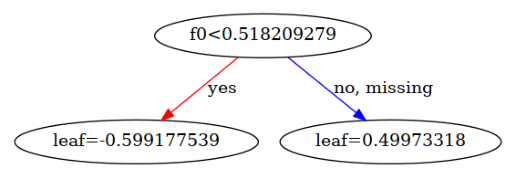

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data dummy untuk ilustrasi
import numpy as np

# Membuat data dummy dengan satu fitur
X = X
y = (X[:, 0] > 0.5).astype(int)  # Membuat label biner berdasarkan threshold 0.5

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model XGBClassifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Menampilkan pohon keputusan
num_trees = 99  # Menentukan nomor pohon yang akan ditampilkan
plt.figure(figsize=(10, 8))
xgb.plot_tree(model)
plt.show()
